<a href="https://colab.research.google.com/github/sahilgupta2210/Stock-Portfolio-Optimization-using-MPT-and-LSTM/blob/main/Stock_Portfolio_Optimization_using_MPT_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3MB 6.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=630286d6d9c289700cde6bb2b5825f71dd38f2d7d6dbdc42da5b6bb3e14431f5
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as wb
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf
%matplotlib inline

### Importing Data

In [ ]:
stocks = input().split()
asset = [stock.upper() + '.NS' for stock in stocks]
asset

#Example: SBIN HDFC  ONGC WIPRO HEROMOTOCO LT ITC COALINDIA RELIANCE NCC  

SBIN HDFC  ONGC WIPRO HEROMOTOCO LT ITC COALINDIA RELIANCE NCC 


['SBIN.NS',
 'HDFC.NS',
 'ONGC.NS',
 'WIPRO.NS',
 'HEROMOTOCO.NS',
 'LT.NS',
 'ITC.NS',
 'COALINDIA.NS',
 'RELIANCE.NS',
 'NCC.NS']

In [ ]:
asset.sort()

In [ ]:
years = float(input('No. of year data you want to analyze: '))

## Example: 3 or 5 or 8 or 10

No. of year data you want to analyze: 5


In [ ]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days= 365 * years)
startDate

datetime.datetime(2016, 7, 13, 19, 25, 51, 368595)

In [ ]:
yf.pdr_override()

In [ ]:
pf_data = wb.get_data_yahoo(asset, start=startDate, end=endDate)['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [ ]:
pf_data

,COALINDIA.NS,HDFC.NS,HEROMOTOCO.NS,ITC.NS,LT.NS,NCC.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,WIPRO.NS
Date,,,,,,,,,,
2016-07-14,228.008713,1234.089722,2795.560791,213.228821,940.089355,76.331932,123.406441,484.988770,227.817383,210.420929
2016-07-15,223.935242,1272.475586,2781.073242,213.357437,952.948669,75.249542,123.245834,488.511871,227.326385,204.483719
2016-07-18,225.901764,1255.918213,2785.874268,213.400269,946.068359,73.461258,117.009933,485.640289,224.625977,203.543350
2016-07-19,224.005463,1248.641968,2770.014404,213.528900,945.106934,74.073029,118.294594,491.214630,225.460663,202.547668
2016-07-20,231.239395,1244.817261,2807.776855,214.557739,943.934998,74.590706,119.846878,493.724243,226.982697,198.712448
...,...,...,...,...,...,...,...,...,...,...
2021-07-06,147.500000,2496.399902,2919.250000,202.500000,1505.500000,91.500000,121.500000,2124.800049,429.750000,532.599976
2021-07-07,147.550003,2529.199951,2913.350098,203.750000,1516.449951,89.599998,119.900002,2110.050049,432.850006,532.150024
2021-07-08,146.250000,2512.050049,2900.399902,202.000000,1500.699951,90.699997,117.050003,2092.600098,424.450012,531.000000


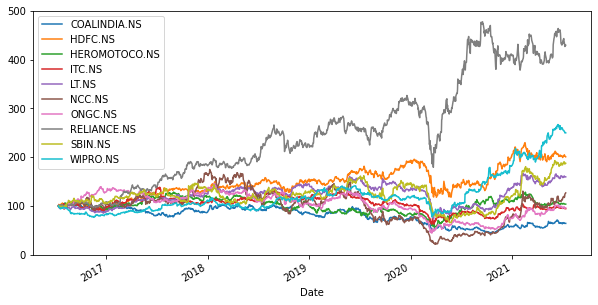

In [ ]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize= (10,5))
plt.show()

# ***Prediction With LSTM:***

In [ ]:
# Importing Required Library

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
## Scaling the data set as required

def Scale_data_set(data):

  dataset = data.values
  # Get the number of rows to train the model on
  training_data_len = int(np.ceil( len(dataset) * .95 ))

  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)
  return training_data_len, scaled_data, dataset, scaler

In [ ]:
## Creating a dataSet to be trained by LSTM

def Creating_training_data(training_data_len, scaled_data):
  # Create the training data set 
  # Create the scaled training data set
  train_data = scaled_data[0:int(training_data_len), :]
  # Split the data into x_train and y_train data sets
  x_train = []
  y_train = []

  for i in range(60, len(train_data)):
      x_train.append(train_data[i-60:i, 0])
      y_train.append(train_data[i, 0])
      
          
  # Convert the x_train and y_train to numpy arrays 
  x_train, y_train = np.array(x_train), np.array(y_train)

  # Reshape the data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  # x_train.shape

  return x_train, y_train

In [ ]:
## Training by  LSTM

def LSTM_model(x_train, y_train):
  
  # Build the LSTM model
  model = Sequential()
  model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))

  # Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')

  # Train the model
  model.fit(x_train, y_train, batch_size=1, epochs=1)

  return model

In [ ]:
## Predicting data using the trained value

def miscellaneous(model, training_data_len, scaled_data, dataset, scaler):
  # Create the testing data set
  # Create a new array containing scaled values from index 1543 to 2002 
  test_data = scaled_data[training_data_len - 60: , :]
  # Create the data sets x_test and y_test
  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])
      
  # Convert the data to a numpy array
  x_test = np.array(x_test)

  # Reshape the data
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

  # Get the models predicted price values 
  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)

  # Get the root mean squared error (RMSE)
  rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

  return predictions, rmse

In [ ]:
## Ploting the chart with predicted values

def Ploting_Prediction(predictions ,training_data_len, data, title):
  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions
  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title(title)
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price in Rs', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
  plt.show()

  return train, valid

def plot_graph_plotly(predictions ,training_data_len, data, title):
  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions

  #Max Sharpe Ratio
  train_data = go.Scatter(
      name='Training data',
      
      x=data.index,
      y=train['Close'],
      marker=dict(color='blue',size=5,)
  )

  #Min Vol
  Val_data = go.Scatter(
      name='Actual Value',
     
      x=valid.index,
      y=valid['Close'],
      marker=dict(color='green',size=5,)
  )

  #Random portfolio
  Prediction_data = go.Scatter(
      name='Predicted Data',
      
      x=valid.index,
      y=valid['Predictions'],
      marker=dict(color='red',size=5,)
  )

  data = [train_data, Val_data, Prediction_data]

  layout = go.Layout(
      title = title,
      yaxis = dict(title='Close Price in Rs'),
      xaxis = dict(title='Date'),
      showlegend = True,
      legend = dict(
          x = .83, y = 0, traceorder='normal',
          bgcolor='#E2E2E2',
          bordercolor='black',
          borderwidth=2),
      width=980,
      height=500)

  fig = go.Figure(data=data, layout=layout)
  fig.show()

  return train, valid

In [ ]:
##  Compiling all functions to one functions

def Stock_prediction(data, title):
  training_data_len, scaled_data, dataset, scaler = Scale_data_set(data)
  x_train, y_train = Creating_training_data(training_data_len, scaled_data)
  model = LSTM_model(x_train, y_train)
  predictions, rmse = miscellaneous(model, training_data_len, scaled_data, dataset, scaler)
  train, valid = plot_graph_plotly(predictions ,training_data_len, data, title)

  return train, valid, rmse, predictions 

## Sending Data for Prediction:

In [ ]:
data = {}
for st in asset:
  data['{}'.format(st)] = pf_data.filter([st])

In [ ]:
pf_data

,COALINDIA.NS,HDFC.NS,HEROMOTOCO.NS,ITC.NS,LT.NS,NCC.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,WIPRO.NS
Date,,,,,,,,,,
2016-07-14,228.008713,1234.089722,2795.560791,213.228821,940.089355,76.331932,123.406441,484.988770,227.817383,210.420929
2016-07-15,223.935242,1272.475586,2781.073242,213.357437,952.948669,75.249542,123.245834,488.511871,227.326385,204.483719
2016-07-18,225.901764,1255.918213,2785.874268,213.400269,946.068359,73.461258,117.009933,485.640289,224.625977,203.543350
2016-07-19,224.005463,1248.641968,2770.014404,213.528900,945.106934,74.073029,118.294594,491.214630,225.460663,202.547668
2016-07-20,231.239395,1244.817261,2807.776855,214.557739,943.934998,74.590706,119.846878,493.724243,226.982697,198.712448
...,...,...,...,...,...,...,...,...,...,...
2021-07-06,147.500000,2496.399902,2919.250000,202.500000,1505.500000,91.500000,121.500000,2124.800049,429.750000,532.599976
2021-07-07,147.550003,2529.199951,2913.350098,203.750000,1516.449951,89.599998,119.900002,2110.050049,432.850006,532.150024
2021-07-08,146.250000,2512.050049,2900.399902,202.000000,1500.699951,90.699997,117.050003,2092.600098,424.450012,531.000000


In [ ]:
for i in asset:
  DATA = data[i]
  DATA = DATA.rename(columns = {i:"Close"})
  train, valid, rmse, predictions = Stock_prediction(DATA, i)
  print("'root mean squared error' of {} = ".format(i) + str(rmse))


1110/1110 [==============================] - 52s 30ms/step - loss: 0.0078


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of COALINDIA.NS = 5.077897963078191
1110/1110 [==============================] - 37s 31ms/step - loss: 0.0087


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of HDFC.NS = 49.50871947368658
1110/1110 [==============================] - 38s 31ms/step - loss: 0.0089


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of HEROMOTOCO.NS = 44.997257879303106
1110/1110 [==============================] - 39s 32ms/step - loss: 0.0068


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of ITC.NS = 3.610685502521554
1110/1110 [==============================] - 40s 33ms/step - loss: 0.0143


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of LT.NS = 26.956293990418246
1110/1110 [==============================] - 40s 33ms/step - loss: 0.0113


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of NCC.NS = 3.534653003635259
1110/1110 [==============================] - 40s 33ms/step - loss: 0.0104


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of ONGC.NS = 6.344399528362834
1110/1110 [==============================] - 41s 34ms/step - loss: 0.0074


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of RELIANCE.NS = 63.635123280898824
1110/1110 [==============================] - 41s 34ms/step - loss: 0.0058


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of SBIN.NS = 8.290978976992402
1110/1110 [==============================] - 40s 34ms/step - loss: 0.0026


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'root mean squared error' of WIPRO.NS = 12.664839117294251


#Picking best performing stock

### Returns

In [ ]:
retrn = (pf_data / pf_data.shift(1)) - 1
retrn

,COALINDIA.NS,HDFC.NS,HEROMOTOCO.NS,ITC.NS,LT.NS,NCC.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,WIPRO.NS
Date,,,,,,,,,,
2016-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-15,-0.017865,0.031105,-0.005182,0.000603,0.013679,-0.014180,-0.001301,0.007264,-0.002155,-0.028216
2016-07-18,0.008782,-0.013012,0.001726,0.000201,-0.007220,-0.023765,-0.050597,-0.005878,-0.011879,-0.004599
2016-07-19,-0.008394,-0.005794,-0.005693,0.000603,-0.001016,0.008328,0.010979,0.011478,0.003716,-0.004892
2016-07-20,0.032294,-0.003063,0.013633,0.004818,-0.001240,0.006989,0.013122,0.005109,0.006751,-0.018935
...,...,...,...,...,...,...,...,...,...,...
2021-07-06,-0.016011,0.000601,-0.006399,-0.005647,-0.001625,0.008264,0.004547,-0.011813,-0.006703,-0.006992
2021-07-07,0.000339,0.013139,-0.002021,0.006173,0.007273,-0.020765,-0.013169,-0.006942,0.007214,-0.000845
2021-07-08,-0.008811,-0.006781,-0.004445,-0.008589,-0.010386,0.012277,-0.023770,-0.008270,-0.019406,-0.002161


In [ ]:
annual_returns = retrn.mean() * 250 *100
annual_returns.values[::-1].sort()
annual_returns

COALINDIA.NS     34.421745
HDFC.NS          22.134365
HEROMOTOCO.NS    19.755083
ITC.NS           19.194130
LT.NS            18.788059
NCC.NS           13.320506
ONGC.NS           5.356197
RELIANCE.NS       5.342648
SBIN.NS           2.468492
WIPRO.NS         -4.873557
dtype: float64

In [ ]:
sorted_annual_return = annual_returns[0:5]
sorted_annual_return

COALINDIA.NS     34.421745
HDFC.NS          22.134365
HEROMOTOCO.NS    19.755083
ITC.NS           19.194130
LT.NS            18.788059
dtype: float64

In [ ]:
assets = list(sorted_annual_return.index)
assets

['COALINDIA.NS', 'HDFC.NS', 'HEROMOTOCO.NS', 'ITC.NS', 'LT.NS']

In [ ]:
pf_data = pf_data.filter(assets)
pf_data

,COALINDIA.NS,HDFC.NS,HEROMOTOCO.NS,ITC.NS,LT.NS
Date,,,,,
2016-07-14,228.008713,1234.089722,2795.560791,213.228821,940.089355
2016-07-15,223.935242,1272.475586,2781.073242,213.357437,952.948669
2016-07-18,225.901764,1255.918213,2785.874268,213.400269,946.068359
2016-07-19,224.005463,1248.641968,2770.014404,213.528900,945.106934
2016-07-20,231.239395,1244.817261,2807.776855,214.557739,943.934998
...,...,...,...,...,...
2021-07-06,147.500000,2496.399902,2919.250000,202.500000,1505.500000
2021-07-07,147.550003,2529.199951,2913.350098,203.750000,1516.449951
2021-07-08,146.250000,2512.050049,2900.399902,202.000000,1500.699951


In [ ]:
returns = retrn.filter(assets)
returns

,COALINDIA.NS,HDFC.NS,HEROMOTOCO.NS,ITC.NS,LT.NS
Date,,,,,
2016-07-14,NaN,NaN,NaN,NaN,NaN
2016-07-15,-0.017865,0.031105,-0.005182,0.000603,0.013679
2016-07-18,0.008782,-0.013012,0.001726,0.000201,-0.007220
2016-07-19,-0.008394,-0.005794,-0.005693,0.000603,-0.001016
2016-07-20,0.032294,-0.003063,0.013633,0.004818,-0.001240
...,...,...,...,...,...
2021-07-06,-0.016011,0.000601,-0.006399,-0.005647,-0.001625
2021-07-07,0.000339,0.013139,-0.002021,0.006173,0.007273
2021-07-08,-0.008811,-0.006781,-0.004445,-0.008589,-0.010386


In [ ]:
num_assets = len(assets)
num_assets

5

### Random Weights

In [ ]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.37080928, 0.31935686, 0.02857874, 0.0443715 , 0.23688362])

### Mean Annual Returns

In [ ]:
np.sum(weights * returns.mean()) * 250

0.07610949135892944

### Annual Variance

In [ ]:
np.dot(weights.T, np.dot(returns.cov() * 250, weights))

0.04508575528143814

### Annual Covariance

In [ ]:
np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 250, weights)))

0.21233406528731594

### Correlation

In [ ]:
corr_matrix = returns.corr()
corr_matrix

,COALINDIA.NS,HDFC.NS,HEROMOTOCO.NS,ITC.NS,LT.NS
COALINDIA.NS,1.000000,0.244160,0.270218,0.254954,0.325194
HDFC.NS,0.244160,1.000000,0.369750,0.382062,0.514316
HEROMOTOCO.NS,0.270218,0.369750,1.000000,0.261046,0.383012
ITC.NS,0.254954,0.382062,0.261046,1.000000,0.347024
LT.NS,0.325194,0.514316,0.383012,0.347024,1.000000


#Markovitz Portfolio Theory

5000 Random weights

In [ ]:
pfolio_returns = []
pfolio_volatilities = []
pfolio_weights = []

for x in range (5000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 250, weights))))
    pfolio_weights.append(weights)
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
#pfolio_weights = pfolio_weights.tolist()

# pfolio_returns, pfolio_volatilities, pfolio_weights

In [ ]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})


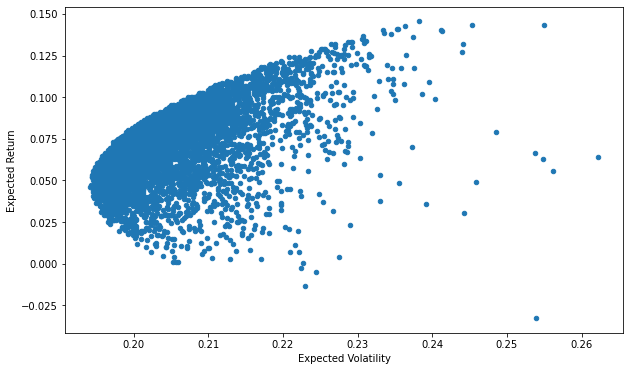

In [ ]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()

In [ ]:
max_return = max(pfolio_returns)
max_return


0.14546052646826468

In [ ]:
max_rindex = np.where(pfolio_returns == max_return)
print(max_rindex)

(array([2730]),)


In [ ]:
max_rvolatility = pfolio_volatilities[max_rindex[0][0]]
max_rvolatility

0.2382202803742296

In [ ]:
max_rweights = pfolio_weights[max_rindex[0][0]]
max_rweights

array([0.01061938, 0.43647872, 0.11335073, 0.00598542, 0.43356574])

In [ ]:
min_volatility = pfolio_volatilities.min()

min_volatility

0.19421065780002275

In [ ]:
min_vindex = np.where(pfolio_volatilities == min_volatility)
min_vindex

(array([4411]),)

In [ ]:
min_vreturns = pfolio_returns[min_vindex[0][0]]
min_vreturns

0.046312439308791614

In [ ]:
min_vweights = pfolio_weights[min_vindex[0][0]]
min_vweights

array([0.26198047, 0.09684746, 0.18491624, 0.274563  , 0.18169283])

In [ ]:
max_sr = []
max_sr =  [str(round(max_return * 100,3) ) + '%', str(round(max_rvolatility * 100,3)) + '%']
for i in range(num_assets):
    max_sr.append(str(round(max_rweights[i] * 100,3)) + '%')
max_sr

['14.546%', '23.822%', '1.062%', '43.648%', '11.335%', '0.599%', '43.357%']

In [ ]:
min_vol = []
min_vol =  [str(round(min_vreturns*100,3)) + '%', str(round(min_volatility * 100,3)) + '%']
for i in range(num_assets):
    min_vol.append(str(round(min_vweights[i] *100,3)) + '%')
min_vol

['4.631%', '19.421%', '26.198%', '9.685%', '18.492%', '27.456%', '18.169%']

In [ ]:
#Max Sharpe Ratio
MaxSharpeRatio = go.Scatter(
    name='Maximium Return',
    mode='markers',
    x=[max_rvolatility],
    y=[max_return],
    marker=dict(color='red',size=14,line=dict(width=3, color='black'))
)

#Min Vol
MinVol = go.Scatter(
    name='Mininium Risk',
    mode='markers',
    x=[min_volatility],
    y=[min_vreturns],
    marker=dict(color='green',size=14,line=dict(width=3, color='black'))
)

#Random portfolio
EF_curve = go.Scatter(
    name='Random Portfolios',
    mode='markers',
    x= pfolio_volatilities,
    y= pfolio_returns,
    marker=dict(color='blue',size=5)
)

data = [MaxSharpeRatio, MinVol, EF_curve]

layout = go.Layout(
    title = 'Portfolio Optimisation with the MPT',
    yaxis = dict(title='Annualised Return'),
    xaxis = dict(title='Annualised Volatility'),
    showlegend = True,
    legend = dict(
        x = .75, y = 0, traceorder='normal',
        bgcolor='#E2E2E2',
        bordercolor='black',
        borderwidth=2),
    width=800,
    height=600)

fig = go.Figure(data=data, layout=layout)
fig.show()

### Max Sharpe ratio and Min volatility table with required weights of stocks

In [ ]:
col = []
col =  ['Returns', 'Volatility']
for i in range(num_assets):
    col.append(pf_data.columns[i])

In [ ]:
result_table = pd.DataFrame(columns  = [col], index=['maximum Return', 'minimun risk'])
result_table.iloc[0] = max_sr
result_table.iloc[1] = min_vol

In [ ]:
result_table

,Returns,Volatility,COALINDIA.NS,HDFC.NS,HEROMOTOCO.NS,ITC.NS,LT.NS
maximum Return,14.546%,23.822%,1.062%,43.648%,11.335%,0.599%,43.357%
minimun risk,4.631%,19.421%,26.198%,9.685%,18.492%,27.456%,18.169%


### Correlation Graph

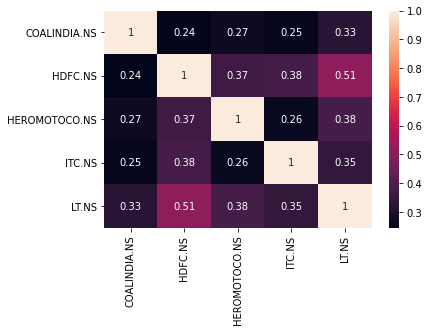

In [ ]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
trace = go.Heatmap(
   x = assets,
   y = assets,
   z = corr_matrix,
   type = 'heatmap',
   colorscale = 'Viridis',
   hovertemplate = "%{z}"
)
layout = go.Layout(
    title = 'Correlation',
    yaxis = dict(title='Stocks'),
    xaxis = dict(title='Stocks'),
    showlegend = False,
    width=500,
    height=500)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

# **🙂🙂🙂**